## Machine Learning CA1

Student: Charles Franklin Jahn 2020315

Lecturer: David Mcquaid

CCT College Dublin

BSc (Hons) in Computing in IT - 4nd Year

22/04/2023

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score

C:\Users\charl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Analysis
After the exploratory analysis, I found that the data set has no missing values and is mainly composed of numerical variables, with the exception of the “Action” column, which is categorical. 

The distribution and variability of data can be understood by descriptive statistics, and the behavior of the target class "Action" can be influenced by the type of parameters such as source and destination ports, bytes transmitted and received, and elapsed time. 
It is important to understand these properties in order to select and modify classification algorithms in a way that best models stock classification behavior using the provided attributes.

The distribution of "Action" values can be visualized in a graph, highlighting the predominance of the "allow" action and the total absence of the "reset-both" action. Furthermore, it is observed that the "drop" and "deny" actions are very close in terms of frequency, suggesting the importance of distinguishing between these two classes for an accurate classification. These observations provide valuable insights for the selection and tuning of classification algorithms.

In [2]:
df = pd.read_csv("log2.csv")
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [3]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


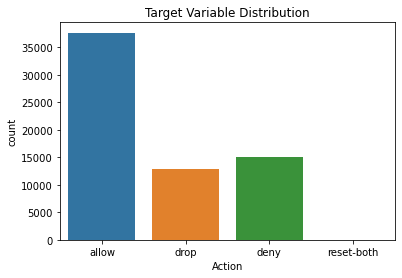

In [5]:
sns.countplot(x='Action', data=df)
plt.title('Target Variable Distribution')
plt.show()

### Preparing data

In the case of this dataset, as there are no missing or 'N/A' values, no preparation was required to deal with this scenario. However, in different datasets it is possible to find missing or 'N/A' values, in such cases if the number of missing data is low, a suitable approach would be to simply discard the rows with missing values. However, if the number of missing data is significant, a common approach would be to use data imputation, such as replacing the missing values with a random value from the same distribution as the existing data or the mean of the data, depending on the context of the data set.

In my code, I prepared the data in two steps: encoding the categorical variable "Action" using LabelEncode and splitting the data into training and testing sets.

Encoding the Categorical Variable "Action" using LabelEncoder:
The categorical variable "Action" needed to be converted to a numeric form so that the classification algorithms could process it. The LabelEncoder assigns a unique integer to each variable category. For example, "allow" can be assigned to 0 and "deny" to 1, all of this is done automatically by the library itself. This encoding allows algorithms to interpret and process the "Action" variable as part of the input characteristics.

Division of Data into Training and Test Set:
Splitting the data into training and testing sets allows you to evaluate the performance of models on unseen data. The training set is used to train the models, while the test set is used to evaluate the models' performance on data that was not used during training. This helps verify that models generalize well to new data and identify problems such as overfitting or underfitting.

In [6]:
# verify if there is any null value
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

### Testing

Test_size=0.2:

The RandomForestClassifier (RFC) demonstrated high performance, achieving an accuracy of 99.97% in training and 99.86% in testing with a test set representing 20% of the data. These results indicate that the model was able to accurately capture patterns in the data and generalize well to unseen data.
On the other hand, the Support Vector Machine (SVM) obtained a significantly lower accuracy, with 74.49% in training and 75.02% in testing. This suggests that the SVM may not have been able to capture the complexity of the patterns present in the data, resulting in less effective generalization.


Test_size=0.3:

With an increase in size to 30% of the data, the results remained consistent for the RandomForestClassifier (RFC), with an accuracy of 99.97% in training and 99.83% in testing. This indicates a robust generalization capacity of the model even with a larger portion of test data.
The SVM demonstrated a significant improvement in its accuracy, with 89.22% in training and 89.69% in testing. This suggests that with a larger amount of test data, the SVM was able to more effectively learn the underlying patterns in the data and generalize better to new data.


Test_size=0.4:

With an even larger test set, representing 40% of the data, RandomForestClassifier (RFC) performance remained robust, maintaining a high accuracy of 99.97% in training and 99.80% in testing. This confirms the generalization capacity of the model, even with a larger proportion of test data.
The SVM continued to improve its accuracy (compared to 20%), reaching 88.47% in training and 88.91% in testing. Although it still lags behind RFC in terms of accuracy, the performance difference between the two models decreases as the test set increases.


With the results, I conclude that RandomForestClassifier tends to outperform Support Vector Machine, regardless of the size of the test set used. However, it is important to consider that SVM performance improves as the test set size increases, indicating a more effective learning ability with a larger amount of data.

In [7]:
le = LabelEncoder()
df['Action'] = le.fit_transform(df['Action'])

# isolate features and target
X = df.drop(columns=['Action'])
y = df['Action']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [9]:

# Initiating and train using Random Forest
rf_model = RandomForestClassifier(random_state=23) 
rf_model.fit(X_train, y_train)

# Checking the results of Random Forest
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

print("Random Forest - Accuracy of training:", accuracy_score(y_train, rf_pred_train))
print("Random Forest - Accuracy of testing:", accuracy_score(y_test, rf_pred_test))
print("Classification Report on Test Set:")
print(classification_report(y_test, rf_pred_test))


Random Forest - Accuracy of training: 0.9996730031391698
Random Forest - Accuracy of testing: 0.998321464903357
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11373
           1       0.99      1.00      1.00      4474
           2       1.00      1.00      1.00      3796
           3       1.00      0.24      0.38        17

    accuracy                           1.00     19660
   macro avg       1.00      0.81      0.84     19660
weighted avg       1.00      1.00      1.00     19660



In [10]:

# Initiating and train using SVM
svm_model = SVC(random_state=23)
svm_model.fit(X_train, y_train)

# Checking the results of
svm_pred_train = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)

print("SVM - Accuracy of training:", accuracy_score(y_train, svm_pred_train))
print("SVM - Accuracy of testing:", accuracy_score(y_test, svm_pred_test))
print("Classification Report on Test Set:")
print(classification_report(y_test, svm_pred_test))


SVM - Accuracy of training: 0.8922218346703872
SVM - Accuracy of testing: 0.8969481180061037
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     11373
           1       0.98      0.84      0.90      4474
           2       0.67      1.00      0.80      3796
           3       0.00      0.00      0.00        17

    accuracy                           0.90     19660
   macro avg       0.66      0.68      0.66     19660
weighted avg       0.93      0.90      0.90     19660



C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
final_model = rf_model  

final_pred_test = final_model.predict(X_test)

print("Accuracy on the test set using the best model:", accuracy_score(y_test, final_pred_test))
print("Accuracy difference between training and testing set:")
print(accuracy_score(y_train, final_model.predict(X_train)) - accuracy_score(y_test, final_pred_test))


Accuracy on the test set using the best model: 0.998321464903357
Accuracy difference between training and testing set:
0.0013515382358127992


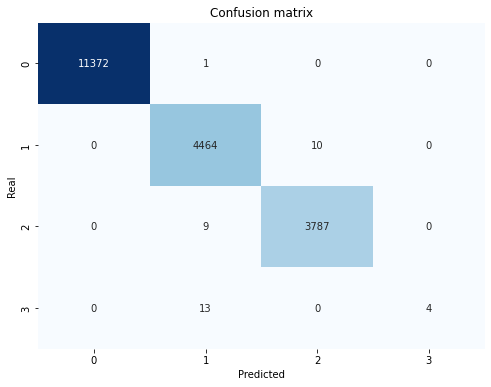

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for the final model
conf_matrix = confusion_matrix(y_test, final_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()


## References:



## GitHub:
https://github.com/CharlesCCT2020315/CA1_Machine_Learning